In [119]:
import json
import csv

def json_to_csv_nested(json_filename, csv_filename, delimiter='_', missing_value=''):
    try:
        # Open the JSON file for reading
        with open(json_filename, 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)
        
        if not data or not isinstance(data, list):
            raise ValueError("Invalid JSON data. Expecting a list of records.")
        
        # Define a dictionary to store the flattened data and column names
        flattened_data = []
        columns = set()
        
        # Flatten the JSON data
        for record in data:
            flat_record = {}
            flatten_json(record, flat_record, delimiter, columns)
            flattened_data.append(flat_record)
        
        # Open the CSV file for writing with UTF-8 encoding
        with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=columns)
            
            # Write the header row to the CSV file
            writer.writeheader()
            
            # Write the data to the CSV file
            for flat_record in flattened_data:
                writer.writerow(flat_record)
        
        print(f"CSV conversion complete. Data from '{json_filename}' saved to '{csv_filename}'.")
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def flatten_json(data, flat_data, delimiter, columns, parent_key=''):
    if isinstance(data, dict):
        for key, value in data.items():
            new_key = parent_key + delimiter + key if parent_key else key
            flatten_json(value, flat_data, delimiter, columns, new_key)
    elif isinstance(data, list):
        for i, item in enumerate(data):
            new_key = parent_key + delimiter + str(i) if parent_key else str(i)
            flatten_json(item, flat_data, delimiter, columns, new_key)
    else:
        flat_data[parent_key] = data
        columns.add(parent_key)


# Usage
json_to_csv_nested("C:/Users/OsamaAl-Mofti/Desktop/HTW Berlin/3rd semester/PM & data analytics lab/tweets_ws23_v1.json", 'tweets.csv', delimiter='_', missing_value='')

CSV conversion complete. Data from 'C:/Users/OsamaAl-Mofti/Desktop/HTW Berlin/3rd semester/PM & data analytics lab/tweets_ws23_v1.json' saved to 'tweets.csv'.


In [120]:
import pandas as pd

df = pd.read_csv('tweets.csv')
df['source_created_at'] = pd.to_datetime(df['source_created_at'])
df['source_created_at'] = df['source_created_at'].dt.strftime('%d/%m/%Y %H:%M:%S')

print(df['source_created_at'])

df.to_csv('tweets_with_formatted_dates.csv', index=False)

0        18/09/2020 21:56:20
1        13/10/2020 07:31:53
2        26/10/2020 19:27:24
3        26/10/2020 19:28:49
4        28/09/2020 11:59:41
                ...         
16944    11/07/2019 07:34:35
16945    10/08/2020 11:19:10
16946    29/08/2020 09:51:10
16947    02/11/2020 12:06:06
16948    02/11/2020 12:06:06
Name: source_created_at, Length: 16949, dtype: object


In [41]:
df.info

<bound method DataFrame.info of       language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           NaN   
3  

In [6]:
df.shape

(16949, 20)

In [7]:
df.columns

Index(['language', 'latitude', 'labels_sentiment_0_tweet_id', 'author_id',
       'source_id', 'text', 'labels_sentiment_0_ground_truth', 'longitude',
       'labels_sentiment_0_user_id', 'labels_topic_0_topic',
       'labels_topic_0_tweet_id', 'labels_topic_0_id',
       'labels_topic_0_ground_truth', 'labels_topic_0_relevant',
       'labels_topic_0_user_id', 'id', 'labels_sentiment_0_sentiment',
       'source_created_at', 'source', 'labels_sentiment_0_id'],
      dtype='object')

In [121]:
# Count unique authors
import matplotlib.pyplot as plt
import seaborn as sns

unique_authors = len(set(df["author_id"]))
print(f"Number of unique authors: {unique_authors}")


Number of unique authors: 7139


In [122]:
# Total number of tweets
Number_of_Tweets = len(df)
print(Number_of_Tweets)

16949


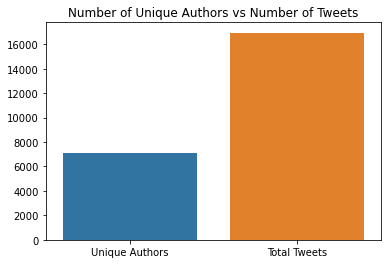

In [123]:
# Create a bar plot
sns.barplot(x=["Unique Authors", "Total Tweets"], y=[unique_authors,Number_of_Tweets])
plt.title("Number of Unique Authors vs Number of Tweets")
plt.show()

In [124]:
from collections import Counter

# Create a Counter to count topics
topics_counter = Counter()

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Access the "labels_topic_0_topic" column for each row
    topic = row["labels_topic_0_topic"]
    # Update the counter with the topic value
    topics_counter.update([topic])

# Print the count of each topic
print("Number of each topic:")
for topic, count in topics_counter.items():
    print(f"{topic}: {count}")


Number of each topic:
service: 884
delays: 9023
toilets: 282
seats: 283
wifi: 620
tickets/seat_reservations: 273
none: 2304
station: 754
covid: 375
doors: 197
train_general: 385
air conditioning: 252
brakes: 44
tables: 189
plugs: 135
noise: 77
windows: 50
hvac: 172
announcements: 315
vandalism: 273
floor: 45
roof: 15
handrails: 2


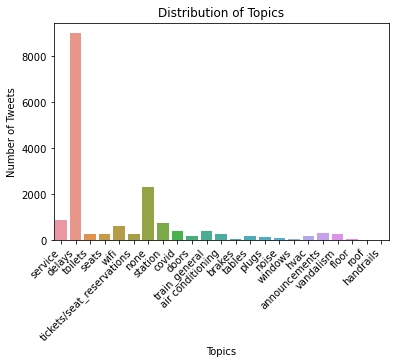

In [91]:
# Create a bar plot
sns.barplot(x=list(topics_counter.keys()), y=list(topics_counter.values()))
plt.title("Distribution of Topics")
plt.xlabel("Topics")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45, ha="right")
plt.show()

In [125]:
from collections import Counter

# Create a Counter to count sentiments
sentiments_counter = Counter()

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Access the "labels_sentiment_0_sentiment" column for each row
    sentiment = row["labels_sentiment_0_sentiment"]
    # Update the counter with the sentiment value
    sentiments_counter.update([sentiment])

# Print the count of each sentiment
print("Number of each sentiment:")
for sentiment, count in sentiments_counter.items():
    print(f"{sentiment}: {count}")


Number of each sentiment:
negative: 10628
neutral: 6079
positive: 242


In [126]:
from collections import Counter

# Create a Counter to count languages
languages_counter = Counter()

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Access the "language" column for each row
    language = row["language"]
    # Update the counter with the language value
    languages_counter.update([language])

# Print the count of each language
print("\nNumber of each language:")
for language, count in languages_counter.items():
    print(f"{language}: {count}")


Number of each language:
en: 6898
en-GB: 10051


In [127]:
# Convert the "source_created_at" field to datetime
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the year from the "source_created_at" field
df['year'] = df['source_created_at'].dt.year

# Count tweets by year
tweet_counts_by_year = df['year'].value_counts().sort_index()

# Print or visualize the result as needed
print(tweet_counts_by_year)

2019    11764
2020     5185
Name: year, dtype: int64


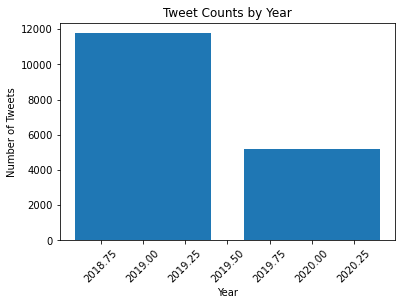

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the JSON data
df = pd.DataFrame(df)

# Convert the "source_created_at" field to datetime
df['source_created_at'] = pd.to_datetime(df['source_created_at'])

# Extract the year from the "source_created_at" field
df['year'] = df['source_created_at'].dt.year

# Count tweets by year
tweet_counts_by_year = df['year'].value_counts().sort_index()

# Create a bar plot
plt.bar(tweet_counts_by_year.index, tweet_counts_by_year.values)

# Customize the plot
plt.title("Tweet Counts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)

# Show the plot
plt.show()

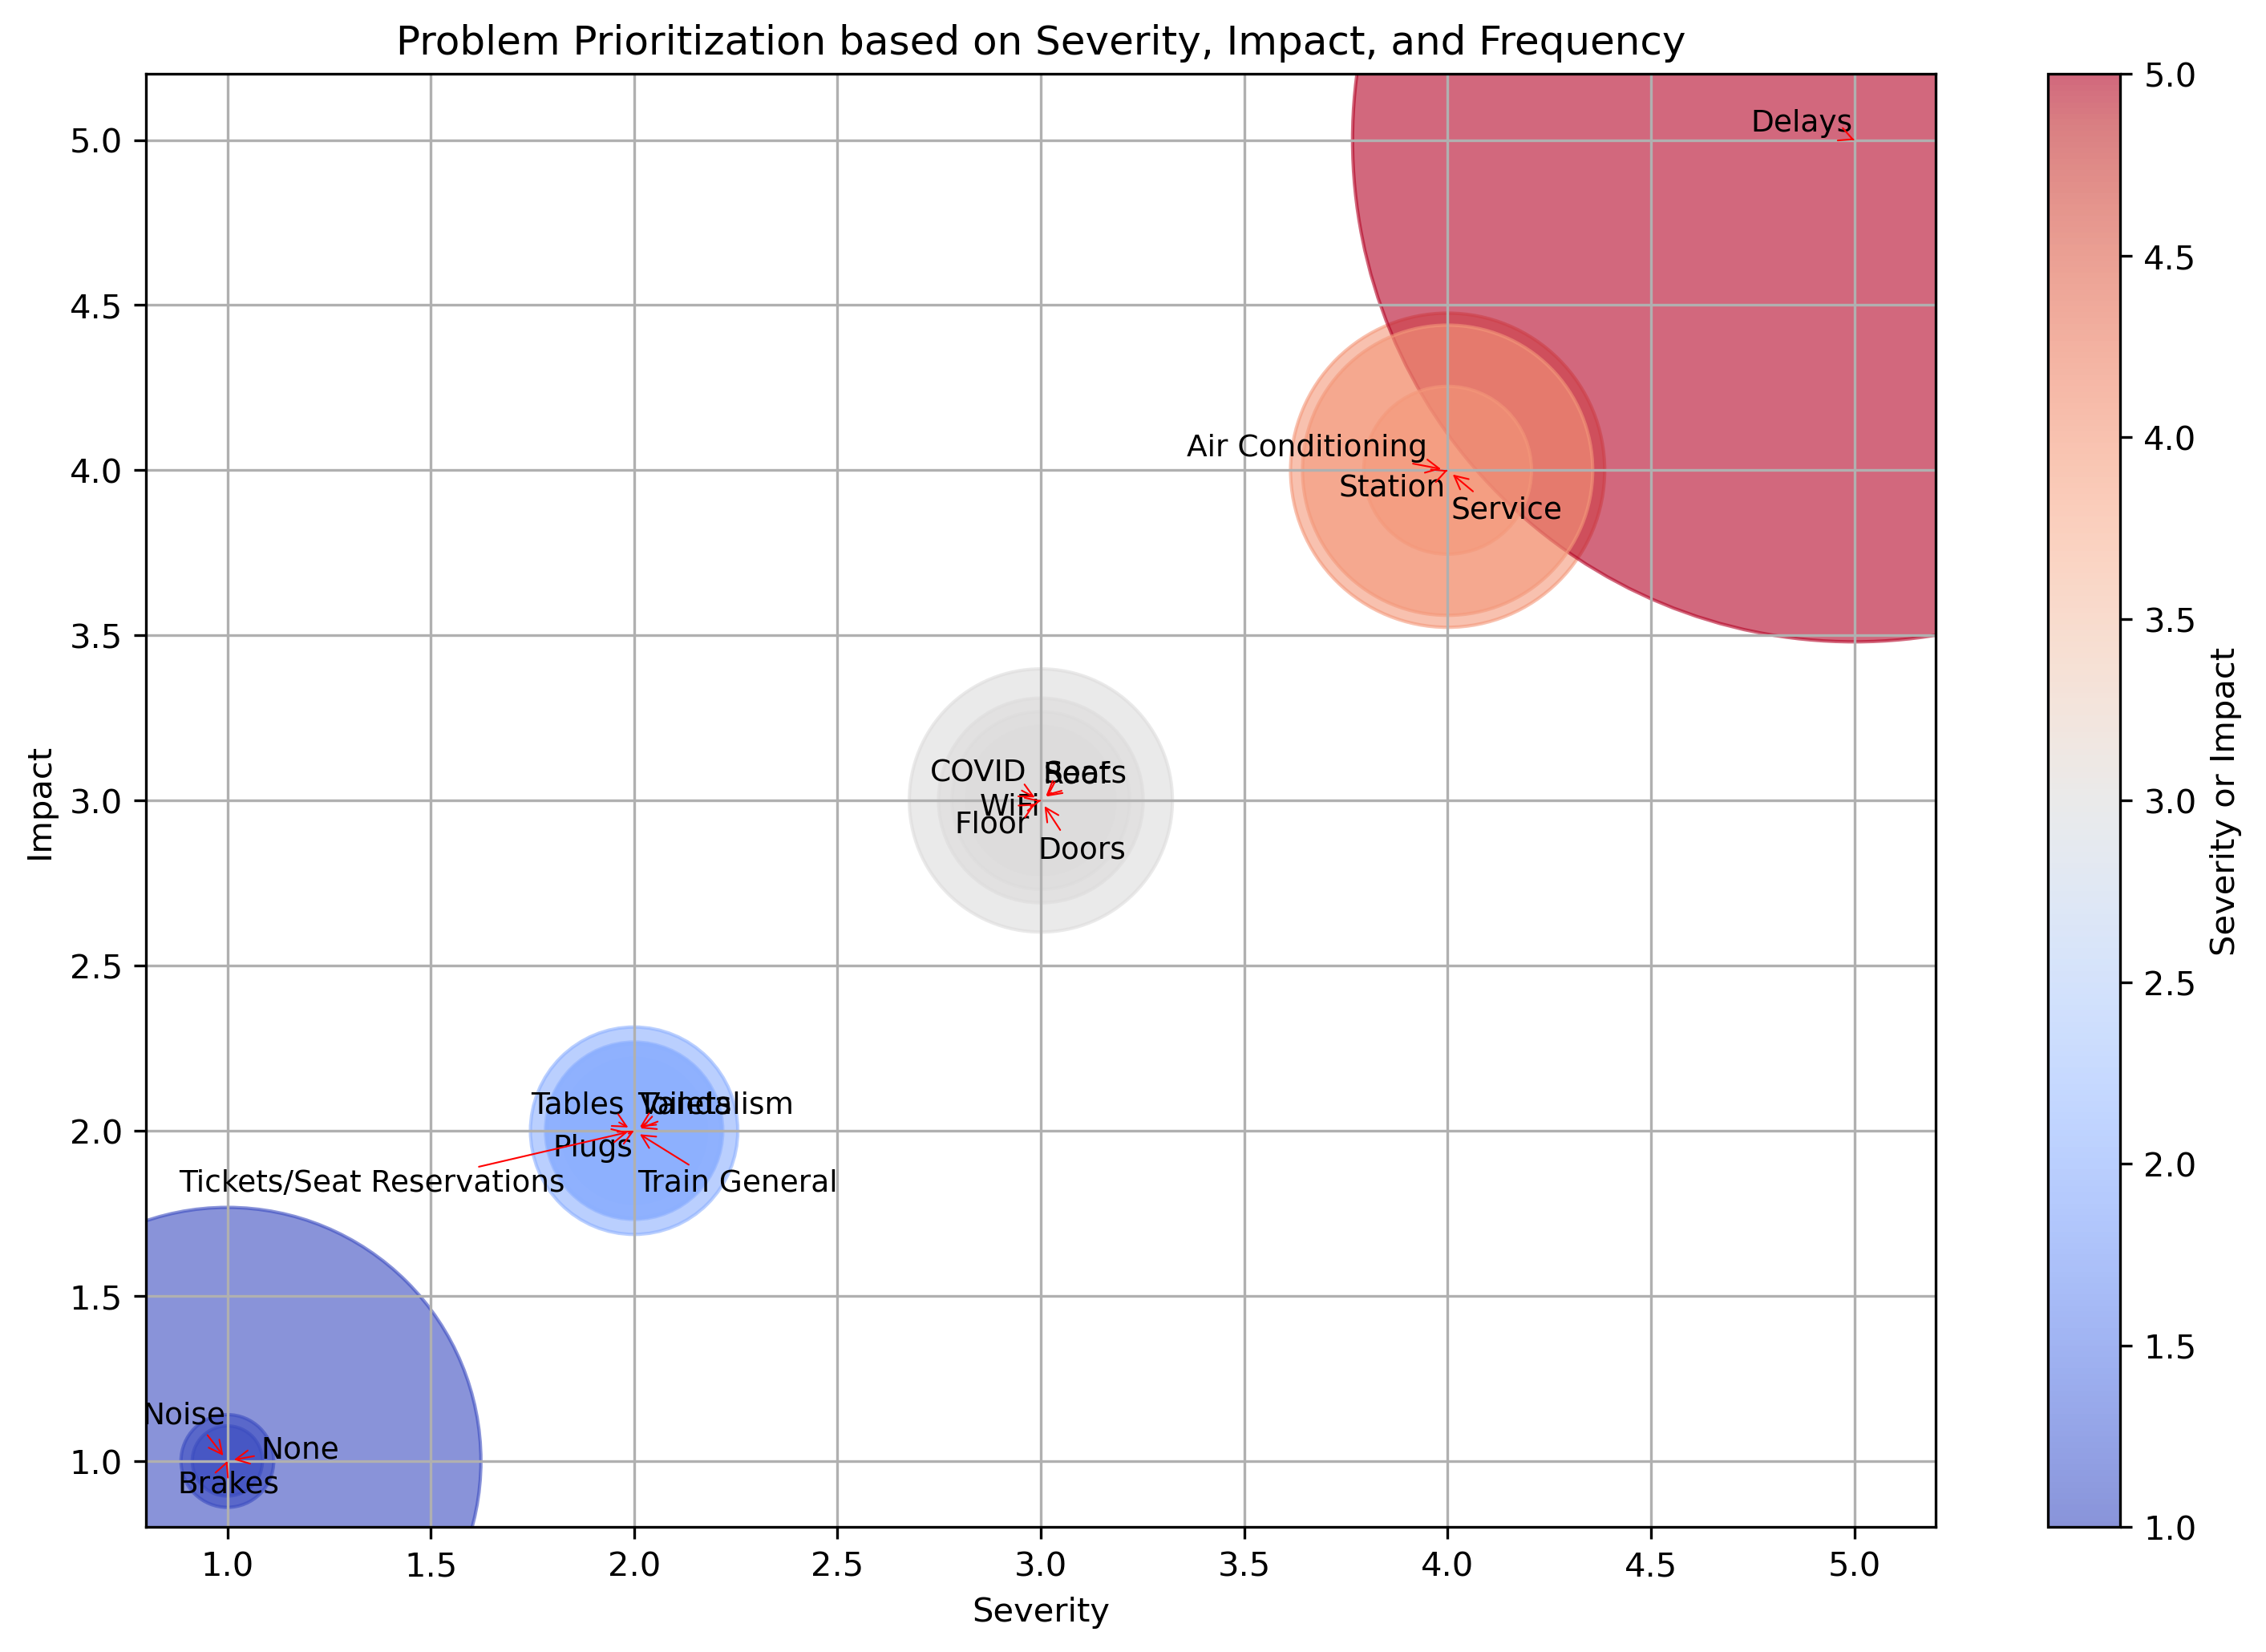

In [129]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Define your data
topics = [
    "Service", "Delays", "Toilets", "Seats", "WiFi", "Tickets/Seat Reservations",
    "None", "Station", "COVID", "Doors", "Train General", "Air Conditioning",
    "Brakes", "Tables", "Plugs", "Noise", "Vandalism", "Floor", "Roof"
]

severity = [4, 5, 2, 3, 3, 2, 1, 4, 3, 3, 2, 4, 1, 2, 2, 1, 2, 3, 3, 4, 1, 1]
impact = [4, 5, 2, 3, 3, 2, 1, 4, 3, 3, 2, 4, 1, 2, 2, 1, 2, 3, 3, 4, 1, 1]
frequency = [884, 9023, 282, 283, 620, 273, 2304, 754, 375, 197, 385, 252, 44, 189, 135, 77, 273, 45, 15, 2]

# Filter topics
filtered_topics = []
filtered_severity = []
filtered_impact = []
filtered_frequency = []

for t, s, i, f in zip(topics, severity, impact, frequency):
    if t not in ["HVAC", "Windows", "Handrails"]:
        filtered_topics.append(t)
        filtered_severity.append(s)
        filtered_impact.append(i)
        filtered_frequency.append(f)

# Calculate the size of each point
scale_factor = 10  # Adjust the scale factor as needed
point_sizes = [f * scale_factor for f in filtered_frequency]

# Create a bubble chart with color mapping
plt.figure(figsize=(12, 8), dpi=300)  # Adjust the dpi as needed
colors = [max(sev, imp) for sev, imp in zip(filtered_severity, filtered_impact)]
scatter = plt.scatter(filtered_severity, filtered_impact, s=point_sizes, c=colors, cmap='coolwarm', alpha=0.6)

# Add labels for each point outside the bubbles
texts = [plt.text(x, y, label, fontsize=9, ha='center', va='bottom') for x, y, label in zip(filtered_severity, filtered_impact, filtered_topics)]

# Use adjust_text to automatically adjust label positions
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

# Customize the color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Severity or Impact', rotation=90)

# Customize the chart
plt.title("Problem Prioritization based on Severity, Impact, and Frequency")
plt.xlabel("Severity")
plt.ylabel("Impact")
plt.grid(True)

# Save the chart with the specified resolution
plt.savefig('prioritization_chart.png', dpi=300)  # Adjust the filename and dpi as needed

# Show the chart
plt.show()

In [130]:
#missing in each column
missing_variables_columns=df.isna().sum()
missing_variables_columns

language                               0
latitude                           15524
labels_sentiment_0_tweet_id            0
author_id                              0
source_id                           1401
text                                   0
labels_sentiment_0_ground_truth        0
longitude                          15524
labels_sentiment_0_user_id             0
labels_topic_0_topic                   0
labels_topic_0_tweet_id                0
labels_topic_0_id                      0
labels_topic_0_ground_truth            0
labels_topic_0_relevant                0
labels_topic_0_user_id                 0
id                                     0
labels_sentiment_0_sentiment           0
source_created_at                      0
source                                 0
labels_sentiment_0_id                  0
year                                   0
dtype: int64

In [131]:
# Count the number of duplicate rows
duplicate_rows_count = len(df[df.duplicated(keep='first')])
print("Number of Duplicate Rows:", duplicate_rows_count)

Number of Duplicate Rows: 218


In [132]:
# Transpose the DataFrame to treat columns as rows and then count duplicate columns
df_transposed = df.transpose()
duplicate_columns_count = len(df_transposed[df_transposed.duplicated(keep='first')])
print("Number of Duplicate Columns:", duplicate_columns_count)


Number of Duplicate Columns: 5


In [133]:
# Drop duplicate rows
df = df.drop_duplicates()
print("DataFrame after dropping duplicate rows:")
print(df)

DataFrame after dropping duplicate rows:
      language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           N

In [102]:
print(df)

      language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           NaN   
3               303134761          

In [134]:
from collections import Counter

# Create a Counter to count topics
topics_counter = Counter()

# Iterate over rows in the DataFrame
for index, row in df.iterrows():
    # Access the "labels_topic_0_topic" column for each row
    topic = row["labels_topic_0_topic"]
    # Update the counter with the topic value
    topics_counter.update([topic])

# Print the count of each topic
print("Number of each topic:")
for topic, count in topics_counter.items():
    print(f"{topic}: {count}")

Number of each topic:
service: 884
delays: 8823
toilets: 282
seats: 283
wifi: 618
tickets/seat_reservations: 273
none: 2296
station: 752
covid: 372
doors: 197
train_general: 384
air conditioning: 252
brakes: 44
tables: 188
plugs: 134
noise: 77
windows: 50
hvac: 172
announcements: 315
vandalism: 273
floor: 45
roof: 15
handrails: 2


In [104]:
num_duplicates = df[df.duplicated()].shape[0]
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [257]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [258]:
import nltk 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nlt

[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to C:\Users\OsamaAl-
[nltk_data]    |     Mofti\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    

True

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

In [165]:
# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\OsamaAl-
[nltk_data]     Mofti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\OsamaAl-
[nltk_data]     Mofti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:
# Assuming you have a DataFrame 'df' with a column 'text' containing the text data

# Split the text into words and count them
total_word_count = df['text'].str.split().apply(len).sum()

# Display the total number of words
print(f"Total number of words in the 'text' column: {total_word_count}")

Total number of words in the 'text' column: 535425


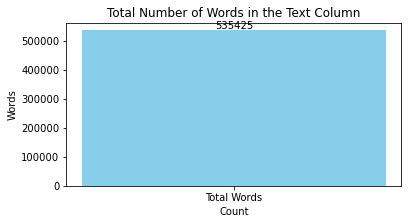

In [136]:
import matplotlib.pyplot as plt

# Assuming you have calculated the total_word_count as shown in the previous response

# Create a bar chart with narrower bars
plt.figure(figsize=(6, 3))  # Adjust the figure size to make it narrower
bars = plt.bar(['Total Words'], [total_word_count], color='skyblue', width=0.4)  # Adjust the width
plt.xlabel('Count')
plt.ylabel('Words')
plt.title('Total Number of Words in the Text Column')

# Display the actual number of words on top of the bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), total_word_count,
             ha='center', va='bottom')

plt.show()



In [137]:
# Assuming you have a DataFrame 'df' with a column 'text' containing the text data
# Define a function to count Twitter handles in a text
def count_twitter_handles(text):
    handles = re.findall(r'@(\w+)', text)
    return len(handles)

# Apply the count_twitter_handles function to the 'text' column
df['twitter_handles_count'] = df['text'].apply(count_twitter_handles)

In [138]:
# Define common cleaning functions
def remove_twitter_handles(text):
    return re.sub(r'@(\w+)', '', text)
df['text_cleaned'] = df['text'].apply(remove_twitter_handles)

In [139]:
# Define a function to count hashtags in a text
def count_hashtags(text):
    hashtags = re.findall(r'#(\w+)', text)
    return len(hashtags)

# Apply the count_hashtags function to the 'text_cleaned' column
df['hashtags_count'] = df['text_cleaned'].apply(count_hashtags)

In [140]:
def remove_hashtags(text):
    return re.sub(r'#(\w+)', '', text)
df['text_cleaned'] = df['text_cleaned'].apply(remove_hashtags)

In [141]:
import pandas as pd
import re
# Define a function to count emojis in a text
def count_emojis(text):
    emojis = re.findall(r'[^\x00-\x7F]+', text)
    return len(emojis)

# Apply the count_emojis function to the 'text_cleaned' column
df['emojis_count'] = df['text_cleaned'].apply(count_emojis)


In [142]:
def remove_emojis(text):
    return text.encode('ascii', 'ignore').decode('utf-8')
df['text_cleaned'] = df['text_cleaned'].apply(remove_emojis)


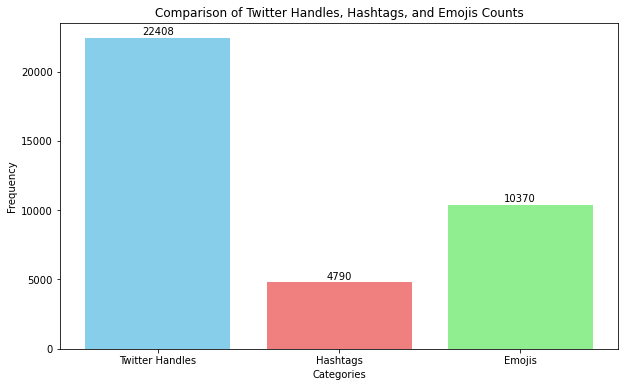

In [143]:
import matplotlib.pyplot as plt

# Calculate the counts for each category
twitter_handles_count = df['twitter_handles_count'].sum()
hashtags_count = df['hashtags_count'].sum()
emojis_count = df['emojis_count'].sum()

# Create a bar chart to compare counts
categories = ['Twitter Handles', 'Hashtags', 'Emojis']
counts = [twitter_handles_count, hashtags_count, emojis_count]
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Comparison of Twitter Handles, Hashtags, and Emojis Counts')

# Annotate the bars with their respective counts
for i, count in enumerate(counts):
    plt.text(i, count + 100, str(count), ha='center', va='bottom')

plt.show()





In [144]:
# Define a function for word tokenization
def tokenize_text(text):
    words = word_tokenize(text)
    return words
df['text_cleaned'] = df['text_cleaned'].apply(tokenize_text)

In [145]:
# Define the remove_stopwords function
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'text' column
df['text_cleaned'] = df['text_cleaned'].apply(remove_stopwords)

In [146]:
# Example usage
text = "I am standing at a Thameslink station"
tokens = tokenize_text(text)
print(tokens)

['I', 'am', 'standing', 'at', 'a', 'Thameslink', 'station']


In [147]:
# Assuming you have a DataFrame 'df' with a column 'text' containing the text data
# Define a function for word tokenization and POS tagging
def pos_tag_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return pos_tags

# Apply the pos_tag_text function to the 'text' column
df['pos_tags'] = df['text_cleaned'].apply(pos_tag_text)

In [148]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in nltk.pos_tag(words)]
    return ' '.join(lemmatized_words)

# Define a function to map POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # Default to noun

# Apply the lemmatize_text function to the 'text' column
df['lemmatized_text'] = df['text_cleaned'].apply(lemmatize_text)

# Display the DataFrame with lemmatized text
print(df)


      language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           NaN   
3               303134761          

In [149]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in nltk.pos_tag(words)]
    return ' '.join(lemmatized_words)

# Define a function to map POS tags to WordNet POS tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return nltk.corpus.wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return nltk.corpus.wordnet.VERB
    elif treebank_tag.startswith('N'):
        return nltk.corpus.wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return nltk.corpus.wordnet.ADV
    else:
        return nltk.corpus.wordnet.NOUN  # Default to noun

# Apply the lemmatize_text function to the 'text' column
df['lemmatized_text'] = df['text_cleaned'].apply(lemmatize_text)

# Display the DataFrame with lemmatized text and sentiment analysis
print(df)


      language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           NaN   
3               303134761          

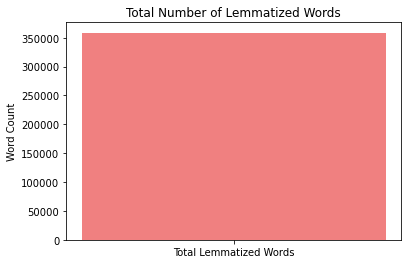

In [150]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'lemmatized_text' column
# Count the total number of lemmatized words in all texts
total_lemmatized_word_count = df['lemmatized_text'].str.split().apply(len).sum()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Total Lemmatized Words'], [total_lemmatized_word_count], color='lightcoral')
plt.title('Total Number of Lemmatized Words')
plt.ylabel('Word Count')
plt.show()


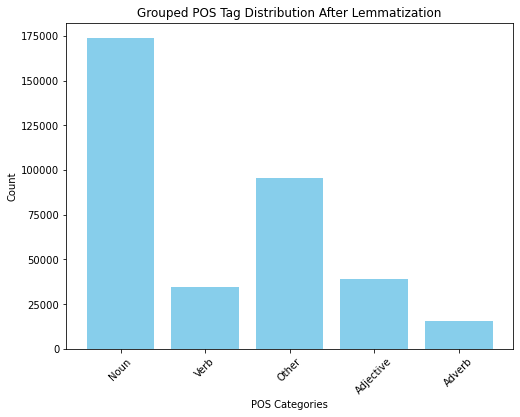

In [151]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'lemmatized_text' column
# and you want to visualize the distribution of grouped POS tags
from collections import Counter

# Concatenate all lemmatized words into a single string
all_lemmatized_words = ' '.join(df['lemmatized_text'])

# Tokenize the concatenated text and tag POS
lemmatized_words = nltk.word_tokenize(all_lemmatized_words)
pos_tags = nltk.pos_tag(lemmatized_words)

# Define a function to map specific POS tags to categories
def map_pos_to_category(tag):
    if tag.startswith('N'):
        return 'Noun'
    elif tag.startswith('V'):
        return 'Verb'
    elif tag.startswith('R'):
        return 'Adverb'
    elif tag.startswith('J'):
        return 'Adjective'
    else:
        return 'Other'

# Apply the mapping function to POS tags
pos_tag_categories = [map_pos_to_category(tag) for _, tag in pos_tags]

# Count the occurrences of each grouped POS category
pos_category_counts = Counter(pos_tag_categories)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(pos_category_counts.keys(), pos_category_counts.values(), color='skyblue')
plt.title('Grouped POS Tag Distribution After Lemmatization')
plt.xlabel('POS Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



In [152]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix

analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    return sentiment

# Apply the get_sentiment function to the lemmatized text
df['lemmatized_sentiment'] = df['lemmatized_text'].apply(get_sentiment)

# Display the DataFrame with lemmatized text and sentiment analysis
print(df)


      language  latitude           labels_sentiment_0_tweet_id  \
0           en  51.50853  acd7673f-e621-5f1a-d662-df278964a6ea   
1           en  51.50853  5b92aba8-4b05-6c63-8485-e9c870742137   
2           en  51.50853  0a799c07-8b76-17ba-b840-e538d51e832d   
3           en  51.50853  8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14   
4           en  50.79899  1fd08862-d8c7-0682-6b11-2603fba22d94   
...        ...       ...                                   ...   
16944    en-GB       NaN  b47948df-1732-7021-ee77-238f839a2ea0   
16945       en  51.50853  bcb3a01a-e58c-e082-3111-10fa77d1a9f7   
16946       en  51.50853  f440c7e6-9e2d-31c4-3626-b9d8288cbbe3   
16947       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   
16948       en  51.50853  859ab156-cad3-3bf0-4b6d-de494b483501   

                author_id     source_id  \
0               593731316           NaN   
1      745583289520496640           NaN   
2               303134761           NaN   
3               303134761          

In [153]:
sentiment_counts_original = df['labels_sentiment_0_sentiment'].value_counts()
sentiment_counts_lemmatized = df['lemmatized_sentiment'].value_counts()

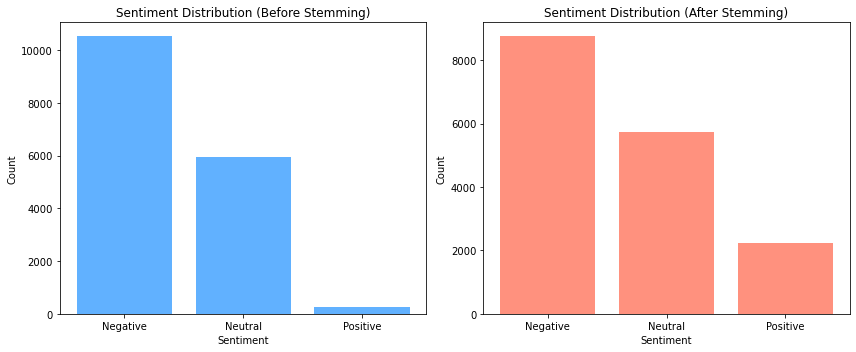

In [154]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot sentiment distribution before lemmatization
ax1.bar(sentiment_counts_original.index, sentiment_counts_original.values, color='dodgerblue', alpha=0.7)
ax1.set_xticks(range(3))
ax1.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count')
ax1.set_title('Sentiment Distribution (Before Stemming)')

# Plot sentiment distribution after lemmatization
ax2.bar(sentiment_counts_lemmatized.index, sentiment_counts_lemmatized.values, color='tomato', alpha=0.7)
ax2.set_xticks(range(3))
ax2.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Count')
ax2.set_title('Sentiment Distribution (After Stemming)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
